병아리의 성장에 영향을 미치는 인자는 무엇인가? 상관분석

1-1 상관분석(Correlation Analysis)

- 연속형인 두 변수 간에 어떤 선형적인(linear) 또는 비선형적인 (non-linear) 관계를 갖고 있는지 분석하는 방법

- 상관계수가 -1과 1사이의 값을 갖는다

중요) 두 변수간의 연관된 정도만을 나타낼 뿐, 인과관계를 설명하는 것은 아니다

1-2 데이터 불러와서 확인

몸무게weight 종란egg_weight 하루 평균 이동거리movement 하루평균 사료 섭취량food 데이터

-> 병아리의 성장에 미치는 변수가 무엇일까

In [1]:
import pandas as pd

test = pd.read_csv('ch5-1.csv')
print(test)

   chick_nm  weight  egg_weight  movement  food
0       a01     140          65       146    14
1       a02     128          62       153    12
2       a03     140          65       118    13
3       a04     135          65       157    13
4       a05     145          69       157    13
5       a06     138          65       143    13
6       a07     125          61       110    11
7       a08     148          69       159    15
8       a09     133          64       133    11
9       a10     145          69       174    13
10      a11     143          67       120    13
11      a12     130          61       109    12
12      a13     133          62       127    12
13      a14     143          67       131    13
14      a15     145          69       128    15
15      a16     128          61       102    11
16      a17     148          70       148    15
17      a18     125          61       125    10
18      a19     145          67       116    15
19      a20     148          69       13

In [2]:
test.head()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


1-3 상관분석을 위한 별도 데이터 셋 만들기

상관분석을 하기 위해서는 숫자 형태의 데이터만 가능, 첫번째 열을 제외하고 별도의 데이터 셋을 따로 만듦

In [3]:
test_n = test.iloc[:,1:5]
test_n.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [4]:
# 상관분석 실시 pearson(상관계수)
test_cor = test_n.corr(method='pearson')
test_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


병아리의 무게와 상관관계가 높은 변수 

첫번째로 종란(egg_weight) 0.95, 

사료가 두번째임 0.87

상관분석 결과 표현하기

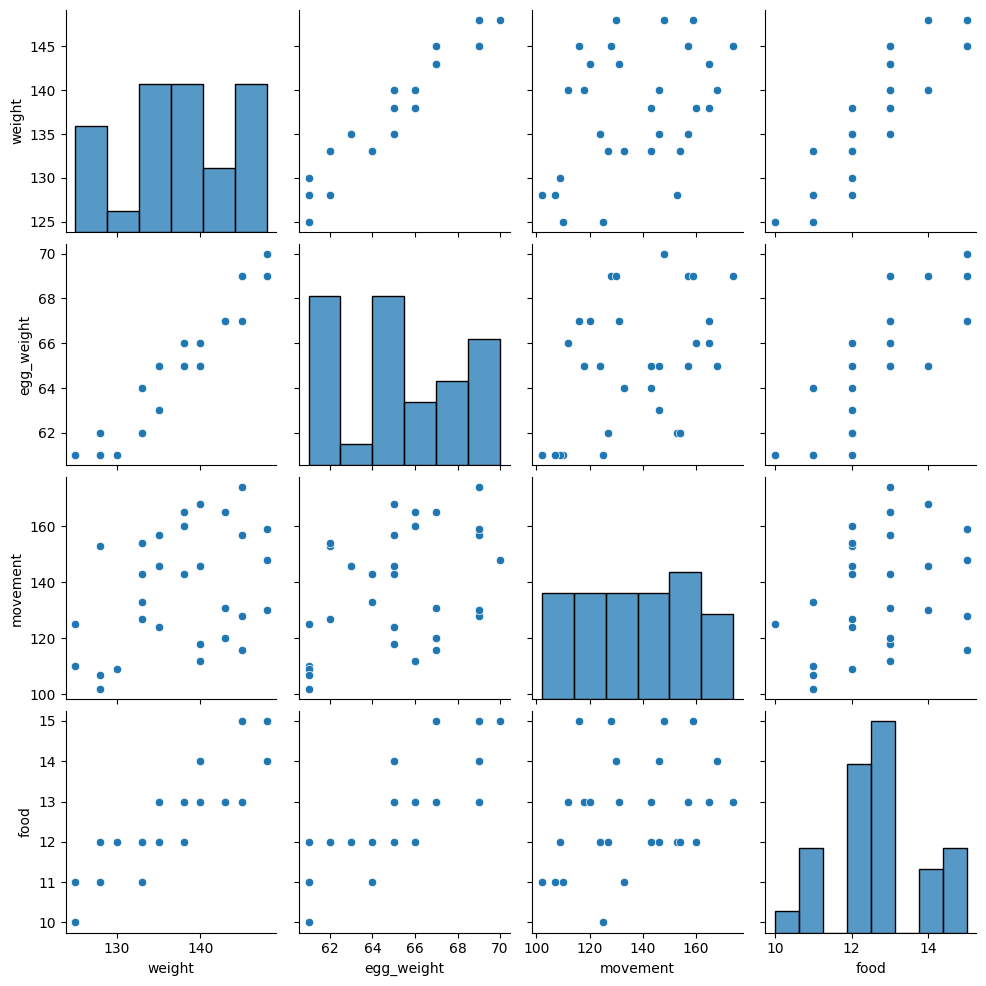

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(test_n)

<Axes: >

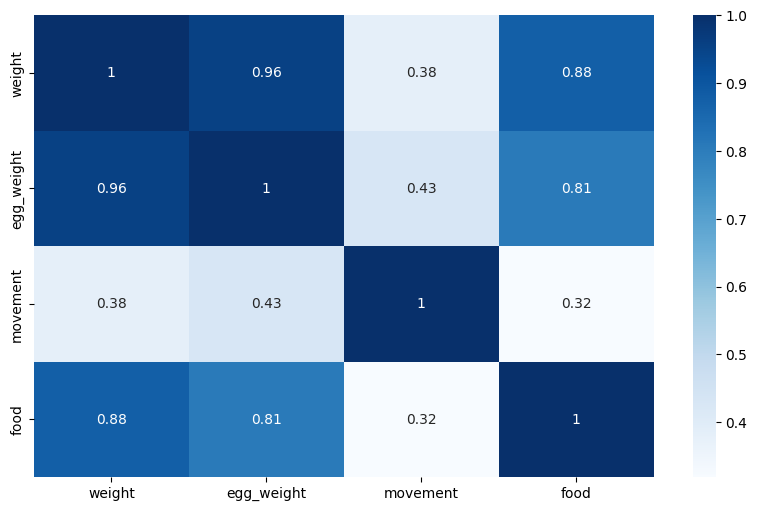

In [6]:
# 상관 행렬도 그리기
plt.figure(figsize=(10,6))
sns.heatmap(test_cor,annot=True,cmap='Blues')

병아리의 몸무게를 예측할 수 있을까? (회귀분석)

* 상관분석을 통해 병아리 몸무게에 영향을 미치는 인자를 찾을수 있었고 태어난 달걀인 종란 무게가 가장 큰 양의 상관관계를 갖고 있음

회귀 분석 : 연속형 변수들에 대해 두 변수간의 관계를 수식으로 나타내는 분석방법

y = ax + b 라는 수식으로 나타내는 방법

1. 단순 선형 회귀분석

상관분석에서 병아리 몸무게와 종란 무게가 가장 큰 상관관계를 가졌었다

수식화를 해보자 y=ax?

In [7]:
# 회귀 분석 수행을 위한 모듈 불러오기 및 smf라는 약어로 지칭하기

import statsmodels.formula.api as smf
# 종란 무게 - 병아리 몸무게 단순 선형 회귀 모델 구축
model_lm = smf.ols(formula= 'weight ~ egg_weight', data=test_n)

result_lm = model_lm.fit() # 모델 학습
result_lm.summary()

ModuleNotFoundError: No module named 'statsmodels'

회귀 분석 결과를 해석한 뒤에는 산점도를 그리고

그 위에 회귀 직선을 표시해 모델이 데이터를 잘 설명하는지 확인 하는것이 좋음 -> 그림으로 표시해보자

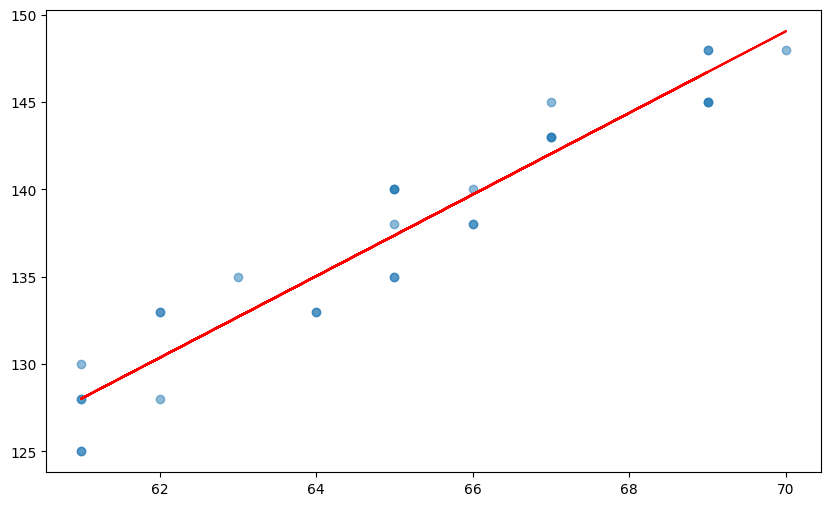

In [ ]:
# 종란 무게에 따른 병아리 무게 산점도

plt.figure(figsize=(10,6))
plt.scatter(test.egg_weight, test.weight, alpha=0.5)
plt.plot(test.egg_weight, test.egg_weight*2.3371 - 14.5475, color = 'red')

잔차(residual)는 표본(sample)으로 추정한 회귀식과 실제 관측값의 차이

In [ ]:
result_lm.resid.head()

0    2.633714
1   -2.354880
2    2.633714
3   -2.366286
4   -1.714829
dtype: float64

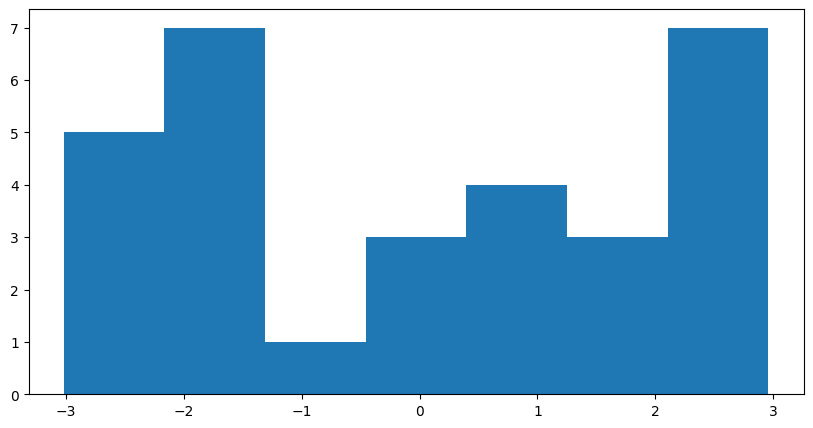

In [ ]:
plt.figure(figsize=(10,5)); plt.hist(result_lm.resid, bins=7); plt.show()

2-3 다중 회귀 분석

독립변수가 2개 이상일 경우에 사용
y= ax1 + bx2 +c 형태

상관계수가 가장 높았던 독립변수인 종란 무게외에 전체 변수를 다 활용

In [ ]:
model_mlm = smf.ols(formula='weight ~ egg_weight + food + movement',data= test_n)

result_mlm = model_mlm.fit()
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           8.46e-17
Time:                        10:10:17   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

하루 평균 이동거리 (movement)는 p값이 0.05보다 매우 커서 95% 신뢰수준에서 통계적으로 유의하지 않음
-> 회귀 분석에서 제외하는 것이 좋겠다

In [ ]:
# 다중회귀 실시 2 
# 출력코드를 보면 p값 신뢰도가 높아짐 - 두가지 요소 사용하는것이 낫네

model_mlm2 = smf.ols(formula='weight ~ egg_weight + food',data= test_n)

result_mlm2 = model_mlm2.fit()
result_mlm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           5.44e-18
Time:                        10:10:17   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다중 회귀 분석에서 변수 선택 방법

후진 소거법 : 모든 변수를 포함한 상태에서 시작해서 영향이 적은 변수를 하나씩 제거하는 방법

전진 선택법 : 그 반대

단계적 방법 : 후진 소거법 + 전진 선택법

2-4 다중 공선성

일반적으로 10 이상 나오면 문제가 있는것으로 판단

In [ ]:
# 다중 공선성 확인을 위한 함수 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀 모델 변수 명 속성 확인
print(model_mlm2.exog_names)

# 1번째 변수 (egg_weight) VIF 계산
vif1 = variance_inflation_factor(model_mlm2.exog, 1)

# 2번째 변수 (food) VIF 계산
vif2 = variance_inflation_factor(model_mlm2.exog, 2)

print(vif1, vif2)

['Intercept', 'egg_weight', 'food']
2.8826845113075725 2.8826845113075756


다중 공선성 실행 - 2개 값 10 넘지 않음

다중회귀 하더라도 문제가 없다

분산 팽창 요인 계산 결과, 종란 무게(egg_weight)와 하루 평균 사료 섭취량(food) 두 가지 독립 변수 모두 2.88 수준으로 10보다 매우 작기 때문에 다중 공선성 문제는 없는 것으로 판단됩니다.

이제 단순 선형 회귀 분석처럼 산점도를 그려서 회귀 모델이 얼마나 적합한지 봐야 하는데, 일반적으로 다중 회귀 분석의 경우 독립 변수가 많기 때문에 최소 3차원 이상의 축을 가진 그래프를 그려야 합니다. 이를 시각적으로 알아보기가 어렵고 그리기도 어렵습니다. 따라서 잔차(residual)의 히스토그램 정도만 확인하겠습니다.

산점도 그리기

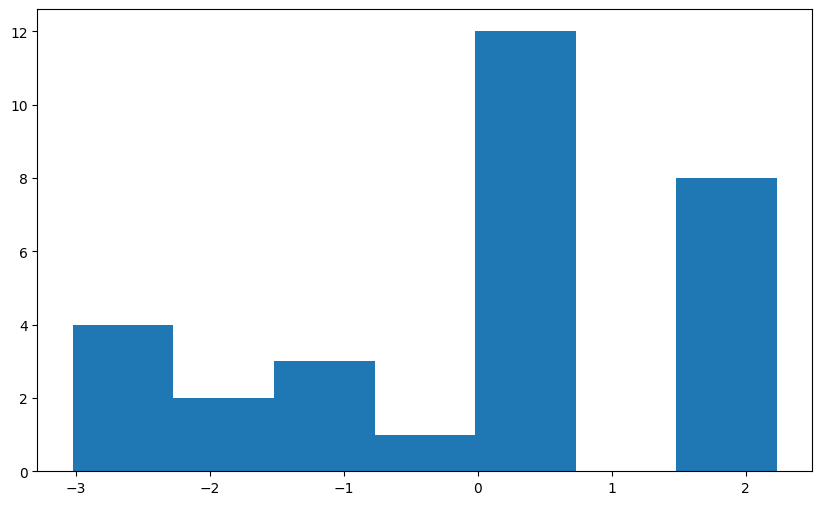

In [ ]:
# 잔차 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(result_mlm2.resid, bins=7)
plt.show()

종모양의 형태 처럼 중간이 큰 잔차를 가짐

회귀분석

1. 데이터 내용 파악(변수 타깃 특성)
2. 상관관계 분석 -> 상관관계가 높은것 위주로 
(1)변수는 다 적용 후에 상관관계 낮은거 제외해 나가는 방식 (2)변수중 상관관계 높은것 선택후, 추가로 변수를 추가해 나가는 방식
3. 회귀분석 p - value 기준

2-5 비선형 회귀 분석

In [ ]:
# 데이터 불러오기
w2 = pd.read_csv('Ch5-2.csv')
print(w2.head())

# 데이터 구조 확인
w2.info()

   day  weight
0    1      43
1    2      55
2    3      69
3    4      86
4    5     104
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     70 non-null     int64
 1   weight  70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


산점도를 통해서 데이터 형태를 확인

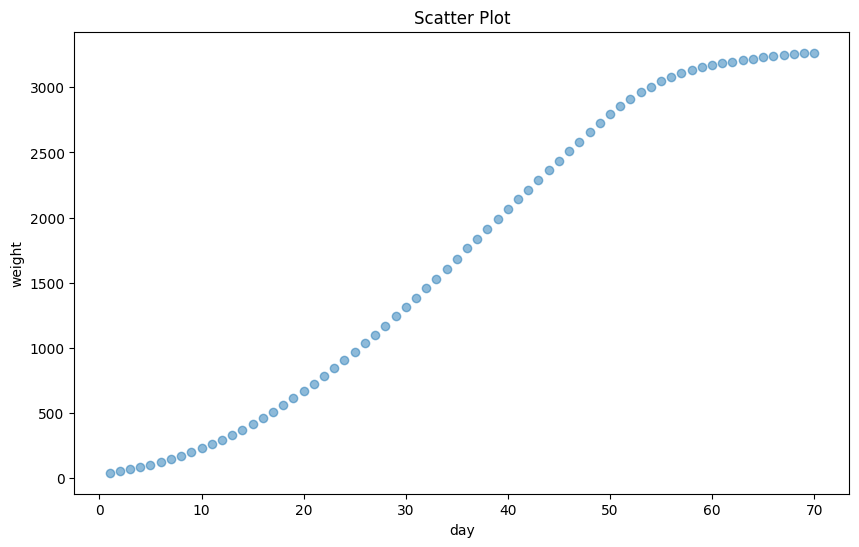

In [ ]:
# 성장 기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10, 6))
# alpha값은 그냥 투명도 조절
plt.scatter(w2.day, w2.weight, alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

데이터가 직선으로 표시가안됨 - 비선형

성장기간에 따른 병아리 몸무게가 직선으로 보기는 적합하지않음 

-> 우선적으로 선형회귀로 분석하고(일단은 선형으로 해보고 아래 코드)

In [ ]:
# 성장 기간에 따른 병아리 몸무게 변화 선형 회귀 분석 실시
model_lm2 = smf.ols(formula='weight ~ day', data=w2)
# 데이터 프레임 w2 -> data = w2
# formula -> weight y 값, day x 값
result_lm2 = model_lm2.fit()


# 선형 회귀 분석 결과 출력
print(result_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           7.22e-59
Time:                        10:31:15   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.0

1) R-squared:                       0.979 -> 1에 가까울수록 신뢰도 올라감 괜찮은 결과임
2) P-value(P>|t|)                   0.000 -> '< 0.05' -> 95% 신뢰 수준에서 유의한 결과임


산점도 + 회귀 분석 결과 직선 추가

*성장 기간에 따른 병아리 몸무게 변화 선형 회귀 분석 결과*

선형 회귀 분석을 실시한 결과, 생각보다 높은 0.979의 R-squared 

회귀 모델 및 개별 독립 변수의 p값도 0.05보다 낮아 95% 신뢰 수준에서 모두 유의함을 확인

그러면 회귀 분석 결과를 이용해 산점도에 적합한 회귀 직선을 추가

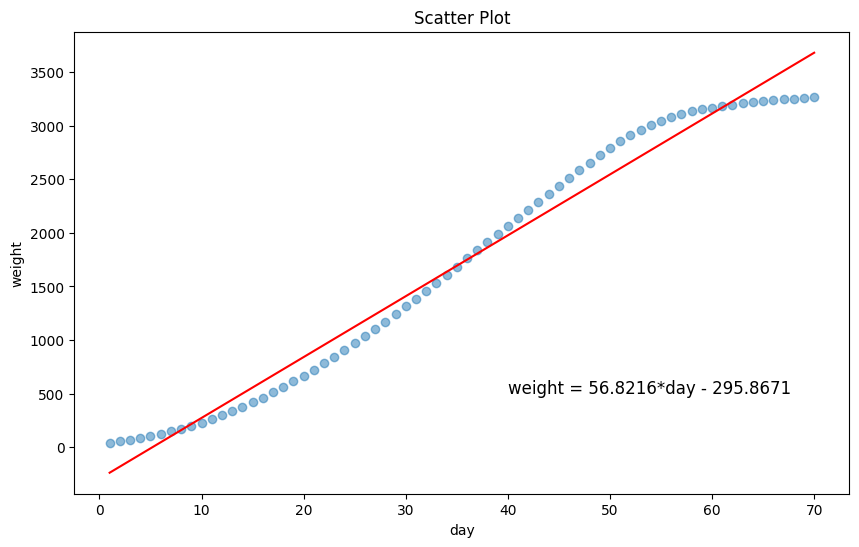

In [ ]:
# 성장 기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10, 6))
plt.scatter(w2.day, w2.weight, alpha=0.5)
plt.plot(w2.day, w2.day * 56.8216 - 295.8671, color='red')
plt.text(40, 500, 'weight = 56.8216*day - 295.8671', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

산점도 위에 회귀 직선을 표시한 결과, 개별 데이터와의 편차가 존재하는 구간들로 인해 회귀 모델의 성능이 다소 아쉽

그런데 이렇게 산점도와 직선을 같이 표시하고 보니 3차 함수의 그래프와 유사함을 발견할 수 있음

독립 변수인 성장 기간(day)을 세제곱 시켜 종속 변수인 몸무게(weight)를 잘 표현할 수 있는지 확인(아래 코드)

In [ ]:
# 성장 기간에 따른 병아리 몸무게 변화 비선형 회귀 분석 실시
model_nlm = smf.ols(formula='weight ~ I(day**3) + I(day**2) + day', data=w2)
result_nlm = model_nlm.fit()

# 비선형 회귀 분석 결과 출력
print(result_nlm.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          7.13e-109
Time:                        10:46:14   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      

선형 회귀 분석 결과도 충분히 높았지만 비선형 회귀 분석을 실시한 결과 R-squared가 1을 나타남

산점도를 다시 그린 뒤 회귀 분석 결과를 이용해 산점도 위에 적합한 회귀 곡선을 추가

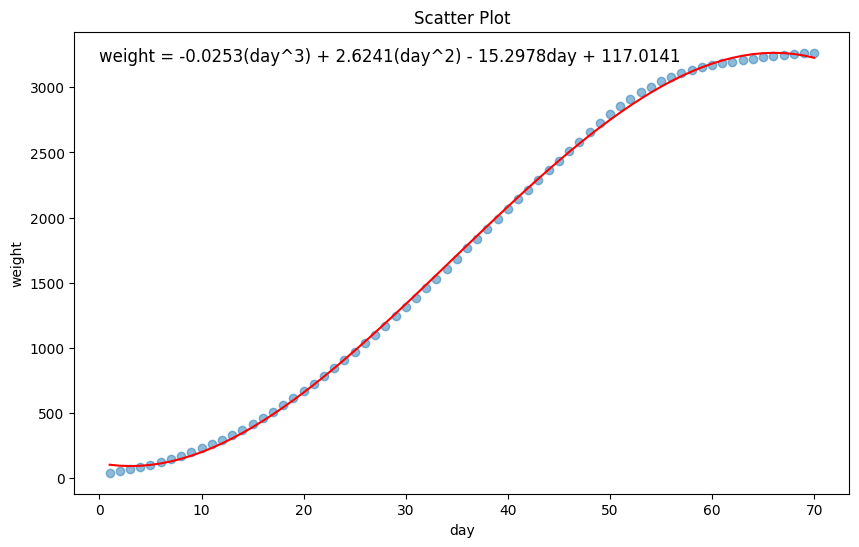

In [ ]:
# 성장 기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10, 6))
plt.scatter(w2.day, w2.weight, alpha=0.5)
plt.plot(w2.day, (w2.day**3)*(-0.0253) + (w2.day**2)*2.6241 + w2.day*(-15.2978) + 117.0141, color='red')
plt.text(0, 3200, 'weight = -0.0253(day^3) + 2.6241(day^2) - 15.2978day + 117.0141', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

산점도와 회귀 곡선이 거의 일치함을 확인